In [100]:
import matplotlib.pyplot as plt

from pathlib import Path

from utils import load_data

import seaborn as sns
sns.set_style("whitegrid") # if you don't like the grid: `whitegrid` --> `white`
sns.set_context("paper", font_scale = 2)

In [104]:
# UniRef50 100k sample
# output_directory = Path("../private/uniref50_051121_rnd100k")

# ProtGPT2 100k generated
output_directory = Path("../private/protGPT2_100k_maxL150_minPPL72")

data = load_data(output_directory)
print(f"These columns can be queried: {', '.join(data.columns.values)}")

/home/mheinzinger/work_space/code_base/PPIHP-main/notebooks/utils.py:48: FutureWarning: The default value of regex will change from True to False in a future version.
  conservation['conservation_categorical'] = conservation.conservation.str.replace(r"[0-2]", 'L').str.replace(r"[3-5]", 'M').str.replace(r"[6-9]", 'H')


These columns can be queried: header, sequence, length, ppl, disorder, disorder_categorical, disorder_average, disorder_count, disorder_percent, disorder_stretches, metal, metal_count, metal_percent, small, small_count, small_percent, nucleic, nucleic_count, nucleic_percent, conservation, conservation_categorical, conservation_high_count, conservation_high_percent, conservation_low_count, conservation_low_percent, dssp3, helix_count, helix_percent, strand_count, strand_percent, strand_stretch_count, helix_four_count, helix_four_percent, helix_stretch_count, BPO_reference, BPO_terms, BPO_distance, CCO_reference, CCO_terms, CCO_distance, MFO_reference, MFO_terms, MFO_distance, subcellular_location, CATH_reference, CATH_superfamily, CATH_distance, transmembrane, signal_residue_count, signal_protein, signal_residue_percent, transmembrane_helix_count, transmembrane_helix_percent, transmembrane_helix_stretches, transmembrane_strand_count, transmembrane_strand_percent, transmembrane_strand_st

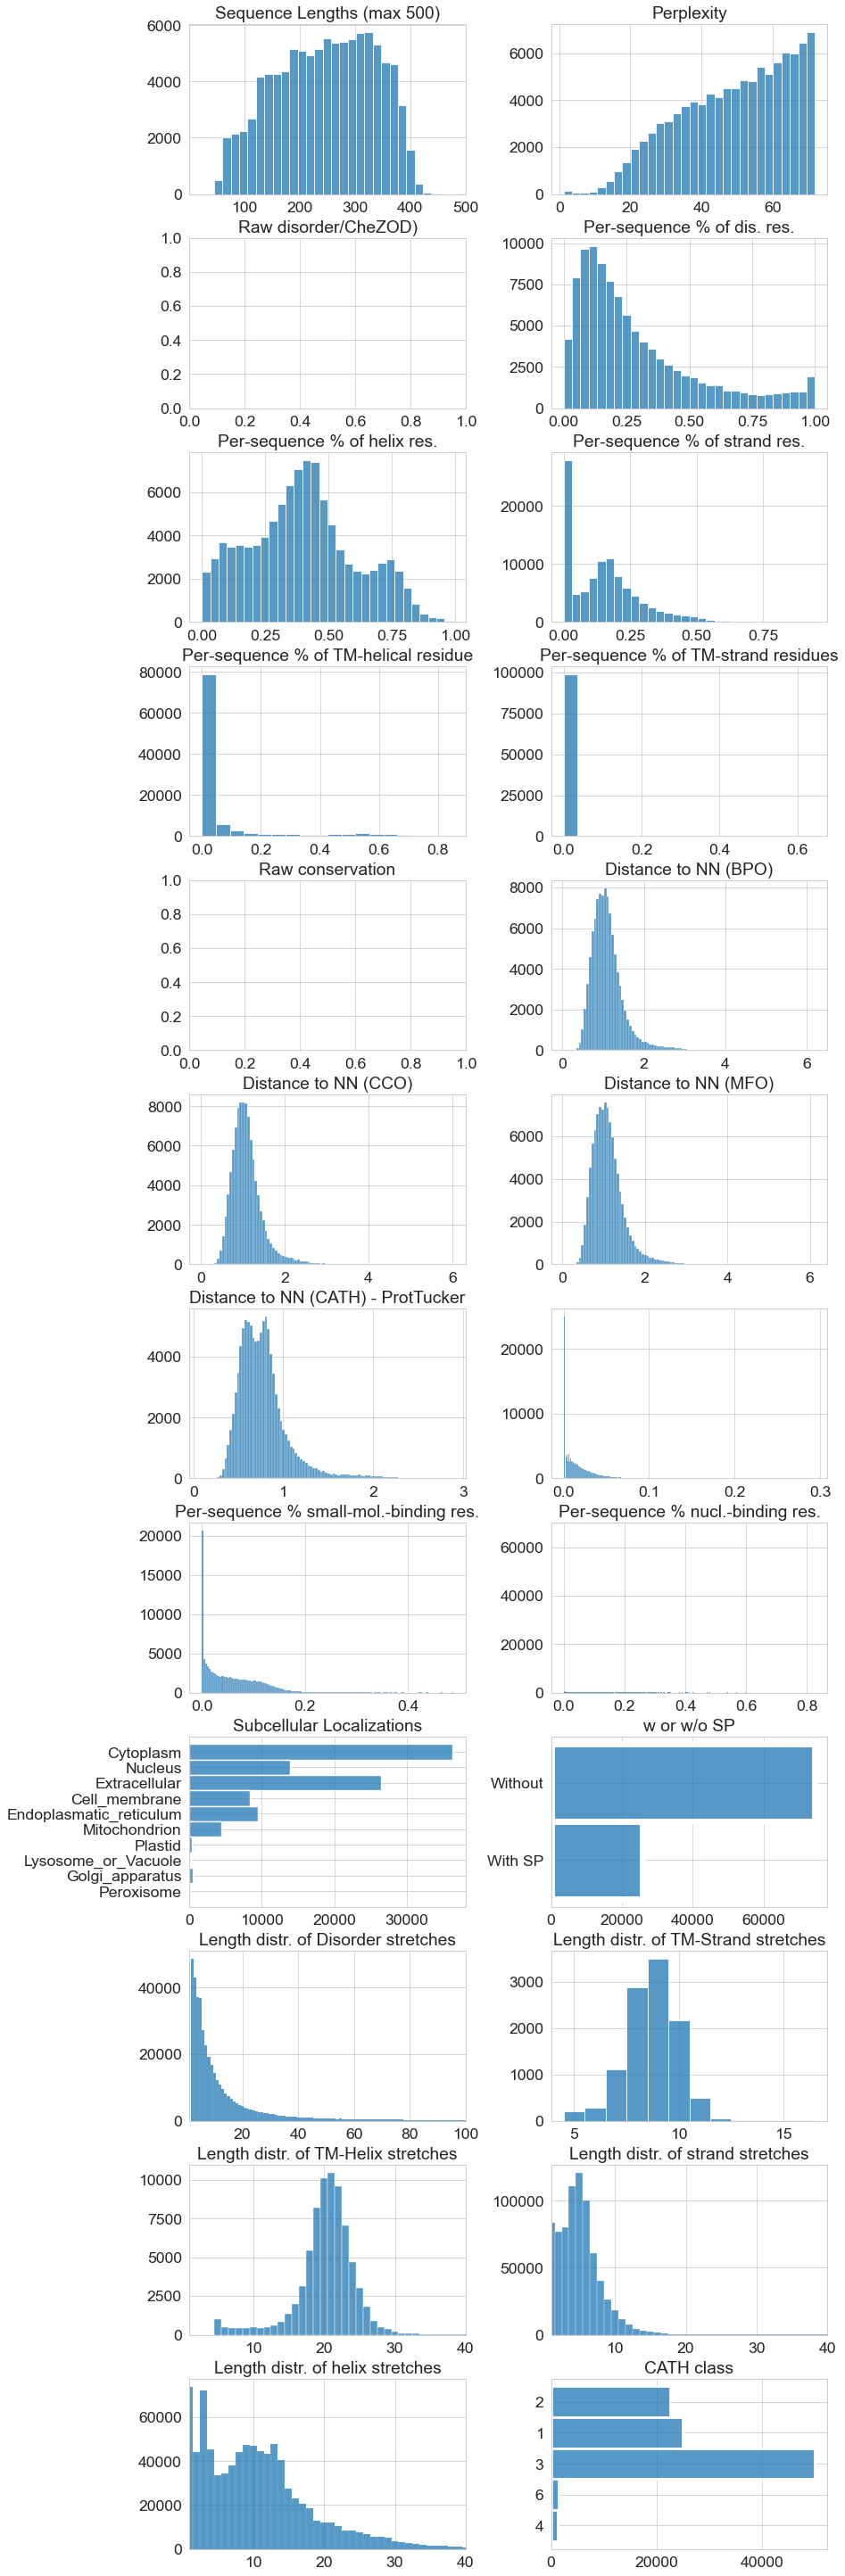

In [122]:
nrows=12
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(13,4*10), constrained_layout=True)

# Let's check some basic sequence statistics first:
# Length distribution of sequences
length_histo=sns.histplot(data=data, x="length", ax=ax[0,0],bins=30)
length_histo.set_xlim(1,500)
ax[0,0].set_title("Sequence Lengths (max 500)")
# Perplexity
if "ppl" in data.columns.values:
    sns.histplot(data=data, x="ppl", ax=ax[0,1], bins=30)
    ax[0,1].set_title("Perplexity")

# Next, we zoom into disorder:
# flatten the list-of-lists to make it seaborn compatible
#disorder_raw=[ chezod for chezod_list in data.disorder for chezod in chezod_list]
#sns.histplot(disorder_raw,ax=ax[1,0],bins=30)
ax[1,0].set_title("Raw disorder/CheZOD)")
# Percentage of disordered residues (CheZOD<8)
sns.histplot(data=data,x="disorder_percent",ax=ax[1,1],bins=30)
ax[1,1].set_title("Per-sequence % of dis. res.")

# Let's analyze some structural aspects of our protein set
# Secondary structure
sns.histplot(data=data,x="helix_percent",ax=ax[2,0],bins=30)
ax[2,0].set_title("Per-sequence % of helix res.")

sns.histplot(data=data,x="strand_percent",ax=ax[2,1],bins=30)
ax[2,1].set_title("Per-sequence % of strand res.")

# Secondary structure transmembrane
sns.histplot(data=data,x="transmembrane_helix_percent",ax=ax[3,0])
ax[3,0].set_title("Per-sequence % of TM-helical residue")

sns.histplot(data=data,x="transmembrane_strand_percent",ax=ax[3,1])
ax[3,1].set_title("Per-sequence % of TM-strand residues")

# Look into conservation
#conservation_raw=[ int(cons) for cons_list in data.conservation for cons in cons_list]
#sns.histplot(x=conservation_raw,ax=ax[4,0],discrete=True)
ax[4,0].set_title("Raw conservation")

# GO
sns.histplot(data=data,x="BPO_distance",ax=ax[4,1],bins=100)
ax[4,1].set_title("Distance to NN (BPO)")

sns.histplot(data=data,x="CCO_distance",ax=ax[5,0],bins=100)
ax[5,0].set_title("Distance to NN (CCO)")

sns.histplot(data=data,x="MFO_distance",ax=ax[5,1],bins=100)
ax[5,1].set_title("Distance to NN (MFO)")

# CATH
sns.histplot(data=data,x="CATH_distance",ax=ax[6,0],bins=100)
ax[6,0].set_title("Distance to NN (CATH) - ProtTucker")

# Binding
sns.histplot(data=data,x="metal_percent",ax=ax[6,1])
ax[7,0].set_title("Per-sequence % metal-binding res.")

sns.histplot(data=data,x="small_percent",ax=ax[7,0])
ax[7,0].set_title("Per-sequence % small-mol.-binding res.")

sns.histplot(data=data,x="nucleic_percent",ax=ax[7,1])
ax[7,1].set_title("Per-sequence % nucl.-binding res.")

# Subcellular location
sns.histplot(data=data,y="subcellular_location",ax=ax[8,0])
ax[8,0].set_title("Subcellular Localizations")

# Signal peptides
# it suffices if a single residue is predicted to be a signal-peptide or not
sns.histplot(data=data,y="signal_protein",ax=ax[8,1])
ax[8,1].set_title("w or w/o SP")



# Stretch analysis. Avoid counting single disordered residues
disorder_stretch_counter=[ l for stretch_lens in data.disorder_stretches for l in stretch_lens if l>1]
f = sns.histplot(disorder_stretch_counter,ax=ax[9,0], discrete=True)
f.set_xlim(1,100)
ax[9,0].set_title("Length distr. of Disorder stretches")

tm_strand_stretch_count=[ l for stretch_lens in data.transmembrane_strand_stretches for l in stretch_lens ]
f = sns.histplot(tm_strand_stretch_count,ax=ax[9,1], discrete=True)
ax[9,1].set_title("Length distr. of TM-Strand stretches")


disorder_stretch_counter=[ l for stretch_lens in data.transmembrane_helix_stretches for l in stretch_lens ]
f = sns.histplot(disorder_stretch_counter,ax=ax[10,0], discrete=True)
f.set_xlim(1,40)
ax[10,0].set_title("Length distr. of TM-Helix stretches")

tm_strand_stretch_count=[ l for stretch_lens in data.strand_stretch_count for l in stretch_lens ]
f = sns.histplot(tm_strand_stretch_count,ax=ax[10,1], discrete=True)
f.set_xlim(1,40)
ax[10,1].set_title("Length distr. of strand stretches")

tm_strand_stretch_count=[ l for stretch_lens in data.helix_stretch_count for l in stretch_lens ]
f = sns.histplot(tm_strand_stretch_count,ax=ax[11,0], discrete=True)
f.set_xlim(1,40)
ax[11,0].set_title("Length distr. of helix stretches")

cath_supFam=[ cath.split(".")[0] for cath in data.CATH_superfamily ]
f = sns.histplot(y=cath_supFam,ax=ax[11,1], discrete=True)
ax[11,1].set_title("CATH class")

# De-activate x- / y-axis labels for the moment
for i in range(nrows):
    for j in range(ncols):
        ax[i,j].set(xlabel=None)
        ax[i,j].set(ylabel=None)